# Building a neural netowork

In this notebook we will build a general purpose feed forward neural netowork. 
It is assumed that the reader is somewhat familiar with neural networks and is fluent in calculus. If not, a breif (and potentially un-enlightening) introduction to feed forward neural networks (ffnns) is presented in the following. The calculus I can't help you with. Suggested watching is 3Blue1Brown's video series (https://www.youtube.com/watch?v=aircAruvnKk&t=224s&ab_channel=3Blue1Brown) on neural networks. 

Ffnns are baically a whole bunch of connected nodes (neurons) assembled in a layer configuration with an input layer, an arbitrary number of hidden layers, and an output layer. See illustration below:

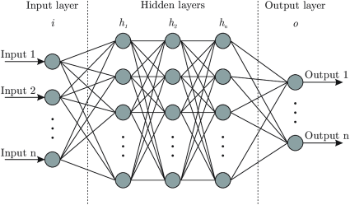

The networks work by feeding some data you want to model into the input layer, and through the magic of maths, a prediction is made in the output layer. I hope the introduction was enlightening. Now: onto the maths.

Each neuon in each (hidden) layer is connected to every neuron in the previous and consecutive layer. So if we input a value into Input 1, this value is sent to each neuron in the first hidden layer, and on the way undergoes a transformation. This is also the case for Input 2, and all inputs up to Input n. 

The connections between these neurons are called weights, and take numerical values. We will discuss these values in detail later. Each neuron also has an asscosiated bias.

Let's start to build a more mathematical formulation of this. We can begin my assesing what happens in neuron 1 in the first hidden layer when an array of data $\mathbf{x}$ of length $n$ is fed into the input layer. Where $x_1$ enters Input 1 $x_2$ enters Input 2, and so on.

The values getting passed to neuron 1 is then $x_i$. But how much of $x_i$ "enters" neuron 1? For each value of $x_i$ we multiply by the weight asscosiated with the connection between the input layer and neuron 1. Mathematically, this is expressed as
$$
y_{in} = \sum_{i=1}^n{w_ix_i}
$$


When the data is recieved in the neuron, the bias of the neuron is added. 
$$
y_{neuron} = \sum_{i=1}^nw_ix_i +b
$$

Now we take a small pause to talk about activation functions. These are functions that dictate how responsive the neuron is to the input. I'll get back to these functions later. At the moment the important thing to remember is that it is adventagous to limit or control how much the input affects the output of the neuron.



With the activation function $f(z)$, the output (or activation) $a$ of the neuron becomes
$$
a = f\biggr(\sum_{i=1}^nw_ix_i +b\biggr)
$$

Now, we can generalize this for every neuron in the first hidden layer. Commence the index bonanza:


For neuron $i$ in layer $1$ (first hidden layer), the input is
$$
z_i^1=\sum_{j = 1}^Mw_{ij}^1x_j+b_i^1
$$
where $M$ is the number of inputs. 

The output of neuron $i$ then becomes
$$
a_i^1=f\biggr(\sum_{j = 1}^Mw_{ij}^1x_j+b_i^1\biggr)
$$

For the hidden layers $l=[2,3 , ..., L]$ - $L$ being the output layer - the output of of the $i$-th neuron becomes
$$
a_i^l=f\biggr(\sum_{j = 1}^{N_{l-1}} w_{ij}^l a_j^{l-1}+b_i^l\biggr)
$$

If we want we can have different activation functions for each layer, so that $a_i^l$ becomes
$$
a_i^l=f^l\biggr(\sum_{j = 1}^{N_{l-1}} w_{ij}^l a_j^{l-1}+b_i^l\biggr)
$$

Now this is all nice and well, but all these indices are honestly too much. Luckily, linear algebra comes to our aid (upper case variables being matrices, and lower case being vectors)
$$
a^1=f^1(X\cdot W^1+\mathbf{b}^1)
\tag{1}
$$
$$
a^l = f^l(a^{l-1}\cdot W^l+\mathbf{b}^l)
\tag{2}
$$
where it is implied that the activation function is applied elementwise to $z$. This means that the activation function $f^l(z)$ is formally defined as
$$
\mathbf{f}(\mathbf{z}):\mathbb{R}^n\rightarrow \mathbb{R}^n
$$
Feel free to call this forshadowing.


Now you might be thing "Congratulations! You have managed to do absolutely nothing in terms of making a data model. And what actually are the weights and biases? WHY ARE WE DOING THIS?"


This is a totally legitimate line of reasoning, and I'm going to pretty much ignore it. What I'll say is that our goal ultimately is to find weights and biases that will transform the input data into the desired data, i.e. make a prediction (that's actually correct) in the output layer. And don't worry fam, I'll get to that now.

The output of the network is the activation of the neuron(s) in the last layer. We write this as
$$
\tilde{y} = a^L
$$

Now, we might want to evaluate how the netowork performed. This is done with a cost function $C(W^L)$. The point of the cost function is to tell us how bad (or) good the netowork did. After feeding the data through the network once, you'd might excpect the prediction to be absolutely useless, and I think you should keep on to that intuition. But we can use this garbage prediction. 

By finding the gradient of the cost function, we can update the weights and biases in such a way that the next prediction is better. Let's do some maths

We define a cost function $C(W^L)=C(f^L(a^{L-1}W^L+b^L))$. We also remind remember that

$$
a^L=f^L(a^{L-1}W^L+b^L)=f^L(z^L)
$$


We then find the derivative (assuming for the moment that all variables and "functions" are one-dimential, e.g. $C(W)=e^W,\; \; \; W\in\mathbb{R}$) of the cost function
$$
\frac{\partial C}{\partial W^L}=\frac{\partial C}{\partial a^L}\frac{\partial a^L}{\partial z^L}\frac{\partial z^L}{\partial W^L}
=\frac{\partial C}{\partial a^L}\frac{\partial a^L}{\partial z^L}a^{L-1}
$$

We write this (in matrix form) as
$$
\nabla_{W^L}C= (a^{L-1})^T\biggr( f'(z^L)\odot\nabla_{a^L}C \biggr) =(a^{L-1})^T\delta^L
\tag{3}
$$
where we define $\delta^L$ as the error in the output layer. We're kinda doing matrix calculus here (not really, I'm just presenting you with a result), so it might be of value to note that we're getting some transposes and hadamard products all of a sudden, and the order of the products are mirrored. I'm not going into any detail about this, but it's easy (not really,  but it's not too hard to work through to show the same result) to see where these come from if you instead work with the explicit form
$$
C(W^L)=C\biggr(f^L\biggr(\sum_{j = 1}^{N_{L-1}} W_{ij}^L a_j^{L-1}+b_i^L\biggr)\Biggr)
$$

You can also use this nifty website http://www.matrixcalculus.org/

We can find the error made by an arbitrary layer with (again assuming variables $\in \mathbb{R}$, not $\mathbb{R}^{n\times m}$)
$$
\delta^l=\frac{\partial C}{\partial z^l}=\frac{\partial C}{\partial z^{l+1}}\frac{\partial z^{l+1}}{\partial z^l}=\delta^{l+1}\frac{\partial z^{l+1}}{\partial z^l}
$$
Now we remember that
$$
z^{l+1}=a^lW^{l+1}+b^{l+1}
$$
thus
$$
\frac{\partial z^{l+1}}{\partial z^l}=f'(z^l)W^{l+1}
$$
Yielding
$$
\delta^l=\delta^{l+1}f'(z^l)W^{l+1}
$$

Or in matrix form
$$
\delta^l=(\delta^{l+1}(W^{l+1})^T)\odot f'(z^l)
$$


$$
\rightarrow \nabla_{W^l}C=a^{l-1}\delta^l
\tag{4}
$$

By using gradient descent we can find the optimal weights for our network
$$
W^l\leftarrow W^l-\eta\nabla_{W^l}C
$$
Where $\eta$ is some tunable parameter we use to scale the gradient if it is too big, so that we don't overshoot the minumum of the cost function

We can do the same thing with the bias bee seeing that
$$
\delta^L=\frac{\partial C}{\partial b^L}\frac{\partial b^L}{\partial z^L}
$$

So now we can also update the biases
$$
b^l\leftarrow b^l-\eta\delta^l
$$

In summation, we have four equations we use to find the error of each layer, and update the weights and biases
$$
\delta^L= f'(z^L)\odot\nabla_{a^L}C
$$
$$
\delta^l = (\delta^{l+1}(W^{l+1})^T)\odot f'(z^l)
$$
$$
W^l\leftarrow W^l-\eta(a^{l-1})^T\delta^l
$$
$$
b^l\leftarrow b^l-\eta\delta^l
$$

This is all well and nice, but we have run into a bit of potentially problematic notation here. That is, we (and pretty much every source I've found on the subject of backpropagation) write $f'(z^L)$, which is ambiguous at best. You might remember me mentioning earlier that we apply the activation function elementwise to the $z^l$ vectors. This means that we actually have
$$
f(z^L)=\sum_{i}f(z_i^L)\hat{e}_i=\sum_{i}f_i\hat{e}_i
$$
$\hat{e}_i$ being a unit vector

Let's take the example where $f(x)=e^{x}$. We get
$$
f(\vec{x})=e^{x_1}\hat{e}_1+e^{x_2}\hat{e}_2+\cdots+e^{x_n}\hat{e}_n
$$
and we have to apply the Jacobian matrix to evaluate any form of derivative of this function.
$$
\mathcal{J}(f(z^L)=
\begin{pmatrix}
\frac{\partial}{\partial x_1}e^{x_1} & \frac{\partial}{\partial x_2}e^{x_1} & \cdots & \frac{\partial}{\partial x_n}e^{x_1}\\
\frac{\partial}{\partial x_1}e^{x_2} & \frac{\partial}{\partial x_2}e^{x_2} & \cdots & \frac{\partial}{\partial x_n}e^{x_2}\\
\vdots &  &\ddots & \vdots\\
\frac{\partial}{\partial x_1}e^{x_m} & \frac{\partial}{\partial x_2}e^{x_m} & \cdots & \frac{\partial}{\partial x_n}e^{x_m}
\end{pmatrix}
$$
Which obviously reduces to
$$
\mathcal{J}(f(z^L))=
\begin{pmatrix}
\frac{\partial }{\partial x_1}e^{x_1} & 0 &\cdots & 0 \\
0 & \frac{\partial }{\partial x_2}e^{x_2} & \cdots & 0\\
\vdots & & \ddots\\
0 & 0 & \cdots & \frac{\partial }{\partial x_n}e^{x_n} \\
\end{pmatrix}
$$

We can see that for these kinds of functions, the derivative must be evaluated as the following Jacobian matrix
$$
\mathcal{J}(f(z^L))=
\begin{pmatrix}
\frac{\partial f_1}{\partial z_1^L} & 0 & \cdots & 0 \\
0 & \frac{\partial f_2}{\partial z_2^L}  & \cdots &0 \\
\vdots & & \ddots \\
0 & 0 & \cdots & \frac{\partial f_n}{\partial z_n^L} \\
\end{pmatrix}
$$

Or we can write 
$$
\mathcal{J}(f(z^L))_{ij}=\delta_{ij}\frac{\partial f_i}{\partial z_j^L}
$$
$\delta_{ij}$ being the Kronecker delta

But there are other types of functions we will want to use, where this very nice behaviour does not emerge. Let's take a look at the softmax function $\sigma(\mathbf{z})_i$:
$$
\sigma(\mathbf{z})_i=\frac{e^{\mathbf{z}_i}}{\sum_{k=1}^Me^{\mathbf{z}_k}},\;\;\; \forall i =1, \cdots, M
$$

We start by differentiating the i-th component w.r.t. $z_j$ (remembering the quotient rule):
$$
\frac{\partial \sigma_i}{\partial z_j}=\frac{\frac{\partial}{\partial z_j}e^{z_i}\sum_ke^{z_k}-e^{z_i}\frac{\partial}{\partial z_j}\Biggr(\sum_ke^{z_k}\Biggr)}{\Biggr(\sum_ke^{z_k}\Biggr)^2}
$$
We evaluate the partial derivatives in the fraction one by each

$$
\frac{\partial}{\partial z_j}e^{z_i}=\delta_{ij}e^{z_i}
$$

$$
\frac{\partial}{\partial z_j}\Biggr(\sum_ke^{z_k}\Biggr)=e^{z_j}
$$

Which gives us
$$
\frac{\partial \sigma_i}{\partial z_j}=\frac{\delta_{ij}e^{z_i}\sum_ke^{z_k}-e^{z_i}e^{z_j}}{\Biggr(\sum_ke^{z_k}\Biggr)^2}
$$


$$
=\frac{e^{z_i}}{\sum_ke^{e_k}}\Biggr(\frac{\delta_{ij}\sum_ke^{z_k}-e^{z_j}}{\sum_k{e^{z_k}}}\Biggr)
$$

$$
=\sigma_i(\delta_{ij}-\sigma_j)
$$

So we see that we in fact have to evaluate every element of the jacobian, since the off-diagonal elements are non-zero. But why make a big deal out of this? Because if the derivative of the activation function always were the diagonal Jacobian matrix, there would be a pretty obvious link between the expressions
$$
f'(z^L)\odot\nabla_{a^L}C
$$
and
$$
\mathcal{J}(f(z^L))\cdot \nabla_{a^L}C
$$


because
$$
\mathcal{J}(f(x))\cdot \nabla _{a^L}C=
\begin{pmatrix}
\frac{\partial f_1}{\partial z_1^L} & 0 & \cdots & 0 \\
0 & \frac{\partial f_2}{\partial z_2^L}  & \cdots &0 \\
\vdots & & \ddots \\
0 & 0 & \cdots & \frac{\partial f_n}{\partial z_n^L} \\
\end{pmatrix}
\cdot
\Biggr[\frac{\partial C}{\partial a_1^L}, \frac{\partial C}{\partial a_2^L},\cdots, \frac{\partial C}{\partial a_n^L}\Biggr]^T
$$

$$
=\Biggr[\frac{\partial f_1}{\partial x_1}\frac{\partial C}{\partial a_1^L},\cdots,\frac{\partial f_n}{\partial x_n} \frac{\partial C}{\partial a_n^L}\Biggr]^T\simeq f'(z^L)\odot\nabla_{a^L}C
$$


To show that $f'(z^L)\odot\nabla_{a^L}C$ and $\mathcal{J}(f(z^L))\cdot \nabla_{a^L}C$ are analogous expressions becomes much harder when the derivative of the activation function is
$$
\mathcal{J}(f(z^L))=
\begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n} \\
\end{pmatrix}
$$
This is because the product $\mathcal{J}(f(z^L))\cdot \nabla_{a^L}C$ becomes
$$
\delta^L=\biggr(\sum_i^n\frac{\partial f_1}{\partial z_i^L}\frac{\partial C}{\partial a_i^L},
\sum_i^n\frac{\partial f_2}{\partial z_i^L}\frac{\partial C}{\partial a_i^L},\cdots,
\sum_i^n\frac{\partial f_m}{\partial z_i^L}\frac{\partial C}{\partial a_i^L}\biggr)
$$
and one can easily lose intuition for what it is that's going on. And to be honest, I'm not going to do much more to help you along the way. We must move on.

For computing these Jacobians and gradients ($\mathcal{J}(f(z^L))$ and $\nabla_{a^L}C$), we will use autograd. Autograd can calculate derivatives, gradients, and jacobians with phenomenal precision. A demonstration:

In [1]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [1]:
import autograd.numpy as np
from autograd import jacobian 
from autograd import elementwise_grad as egrad

#Defining the softmax
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

#Analytically found Jacobian of softmax
def dsdz(z):
    n = len(z)
    arr = np.zeros((n, n))
    s = softmax(z)
    
    for i in range(n):
        for j in range(n):
            if i == j:
                delta_ij = 1
            else:
                delta_ij = 0
            arr[i, j] = s[i]*(delta_ij-s[j])
            
    return arr
#Random input values (z^L)
z = np.random.randn(10)
#Analytical solution
dsdz_an = dsdz(z)
#Numerical solution
dsdz_auto = jacobian(softmax)(z)

#average absolute difference 
np.mean(np.abs(dsdz_auto-dsdz_an))


1.1966881478808755e-18

That should be pretty much everything I wanted to cover. What remains is writing the code for the network.

Now, I have cheated a bit, and I wrote the code for the neural network earlier. Here you go:

In [6]:
class NeuralNet:

    def __init__(self):

        #Lists for holding the weight, bias, etc, matrices/ vectors.
        #Call them (for the time being) "empty" tensors, if you're so inclined
        self.layers = []
        self.act_funcs = []
        self.weights = []
        self.biases = []
        self.Z = []
        self.A = []
        self.delta = []

    def add(self, n_neurons, act_func, input_size = None):

        """
        Sequantially adds layer to network in the order (in, hidden_1, ..., hidden_n, out). When adding input layer,
        input size must be specified.
        """

        if isinstance(n_neurons, int) and n_neurons >= 1:
            self.layers.append(n_neurons)

        else:
            #Should be obvious to anyone attempting to use this class. Still: might catch a typo
            raise TypeError("n_neurons must be of type int and greater than or equal to 1")

        if isinstance(input_size, int):
            #I haven't really discussed initialization of weights and biases. Upsies
            self.weights.append(np.random.randn(input_size, n_neurons)*0.01)

        elif isinstance(input_size, type(None)):
            self.weights.append(np.random.randn(self.layers[-2], n_neurons)*0.01)
        #Errrrr, I'll get back to this
        else:
            raise TypeError("Errr")

        if isinstance(act_func, str):
            function = self.activation_function(act_func)
            self.act_funcs.append(function)
        else:
            raise TypeError("act_func argument must be of type str")

        self.biases.append(np.random.randn(n_neurons)*0.01)

        #For each added layer we append 0 to the lists
        #so that they get the appropriate length
        self.A.append(0)
        self.Z.append(0)
        self.delta.append(0)

    def activation_function(self, act):
        """
        Currently available activation functions:
        "simgoid", "RELU", "leaky_REALU", "softmax", and "linear"

        """

        if act == "sigmoid":
            activ = lambda x: 1/(1+np.exp(-x))

        elif act == "RELU":
            activ = lambda x: np.maximum(x, 0)

        elif act == "leaky_RELU":
            activ = lambda x: np.maximum(x, 0.01 * x)

        elif act == "softmax":
            activ = lambda x: np.exp(x)/np.sum(np.exp(x))

        elif act == "linear":
            activ = lambda x: x

        #Yes, formatting
        else:
            print("-----------------------------------")
            print(" ")
            print(str(act) + " is an invalid activation function name")
            print(" ")
            print("-----------------------------------")

            return

        return activ

    def loss_function(self, loss):
        """Currently available loss functions:
        "MSE", and "categorical_cross"""

        if isinstance(loss, str):
            if loss == "MSE":
                func = lambda x, y: np.mean((x - y)**2, axis = 0, keepdims = True)
            elif loss == "categorical_cross":
                func = lambda x,y: -np.sum(y*np.log(x), axis = 0)
            else:
                raise ValueError("Invalid loss function name")
        else:
            raise TypeError("Loss function argument must be of type str")

        return func

    def feed_forward(self, X):

        #Feeding in feature matrix
        self.Z[0] = X @ self.weights[0] + self.biases[0].T
        #Activation in first hidden layer
        self.A[0] = self.act_funcs[0](self.Z[0])

        for i in range(1, len(self.weights)):
            #Feeding forward
            self.Z[i] = self.A[i-1] @ self.weights[i] + self.biases[i].T
            self.A[i] = self.act_funcs[i](self.Z[i])

    def diff(self, C, A):

        dCda = egrad(C)
        dAdz = jacobian(A)

        return dCda, dAdz

    def back_prop(self, y, diff):

            #Assigning Jacobian and gradient functions as variables
            dC, da = diff
            #"Empty" (Zeros) array to hold Jacobian
            d_act = np.zeros(len(self.Z[-1]))
            #Empty array to hold derivative of cost function
            dcda = d_act.copy()
            #Empty array to hold delta^L
            self.delta[-1] = np.zeros((len(self.Z[-1]), self.layers[-1]))
            #Calculate Jacobian and gradient for each training example in batch
            for i in range(len(self.Z[-1])):
                d_act = da(self.Z[-1][i])
                dcda = dC(self.A[-1][i], y[i])
                #Jacobian of activation times derivative of cost function
                self.delta[-1][i] = d_act @ dcda
                
            #Backprop
            for i in range(len(self.weights)-2, -1, -1):
                #Gradient of activation function of hidden layer i. No need for Jacobian here
                dfdz = egrad(self.act_funcs[i])
                #Equation 2 is calculated in 2 parts. Just for ease of reading
                t1 =  self.delta[i+1] @ self.weights[i+1].T
                self.delta[i] = np.multiply(t1, dfdz(self.Z[i]))

    def optimizer(self, X, eta):
        """
        For the moment only supports mini-batch SGD. More will come (maybe)
        """

        self.weights[0] -= eta * (X.T @ self.delta[0])
        self.biases[0] -= eta * np.sum(self.delta[0], axis = 0)

        for i in range(1, len(self.weights)):
            self.weights[i] -= eta * (self.A[i-1].T @ self.delta[i])
            self.biases[i] -= eta * np.sum(self.delta[i], axis = 0)

    def train(self, X, y, epochs, loss, metric, batch_size = 10, num_iters = 100, eta_init = 10**(-4), decay = 0.1):

        """
        args: X (feature matrix), y (targets), and epochs (type int).
        kwargs: batch_size, num_iters, eta_init, decay. The "standard" values provided by the method
        has been found by testing on one dataset. You should probably not use the values I´ve found.
        """

        diff = self.diff(self.loss_function(loss), self.act_funcs[-1])

        data_indices = len(X)
        #eta function (not the Dirichlet one): for decreasing learning rate as training progresses
        eta = lambda eta_init, iteration, decay: eta_init/(1+decay*iteration)

        for i in range(1, epochs+1):
            for j in range(num_iters):
                eta1 = eta(eta_init, j, decay)
                #Randomly choose datapoints to use as mini-batches
                chosen_datapoints = np.random.choice(data_indices, size = batch_size, replace = False)
                #Making mini-batches
                X_mini = X[chosen_datapoints]
                y_mini = y[chosen_datapoints]
                #Feed forward
                self.feed_forward(X_mini)
                #Backprop
                self.back_prop(y_mini, diff)
                #Update weights and biases
                self.optimizer(X_mini, eta(eta_init, j, decay))

            #Make a prediction and print mean of performance and loss of mini-batch
            predicted = self.predict(X_mini)
            metric_val = np.mean(self.metrics(predicted, y_mini, metric))
            loss_val = np.mean(self.loss_function(loss)(predicted, y_mini))
            #Yes, formatting
            print("mean loss = " + str(loss_val) +" -------------- " + metric + " = " + str(metric_val) + " at epoch " +str(i))

    def metrics(self, y_hat, y, a):
        """
        Takes args: y_hat, y, a (prediction, targets, activation in layer L)
        Currently available metrics:
        "accuracy", and "MSE"
        """
        if a == "accuracy":
            s = 0
            for i in range(len(y)):
                true = np.argmax(y[i])
                pred = np.argmax(y_hat[i])
                if true == pred:
                    s += 1
                else:
                    continue

            return s/len(y_hat)

        elif a == "MSE":
            return np.mean((y-y_hat)**2, axis = 0)


    def predict(self, X):
        """
        Takes arg: X
        Does one feed forward pass and returns the output of last layer
        """
        self.feed_forward(X)
        return self.A[-1]

Now, let's prepare the data and train the network.

In [7]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from time import perf_counter

def fix_data():
    # download MNIST dataset
    digits = datasets.load_digits()

    # define inputs and labels
    inputs = digits.images
    labels = digits.target

    # one-hot encoding the targest
    def to_categorical_numpy(integer_vector):
        n_inputs = len(integer_vector)
        n_categories = np.max(integer_vector) + 1
        onehot_vector = np.zeros((n_inputs, n_categories))
        onehot_vector[range(n_inputs), integer_vector] = 1
        
        return onehot_vector


    n_inputs = len(inputs)
    inputs = inputs.reshape(n_inputs, -1)
    X = inputs
    Y = to_categorical_numpy(labels)
    return X, Y

X, Y = fix_data()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 )

in_size = len(X[0])
out_size = len(y_test[0])

Net = NeuralNet()
#We don't need anything fancy for this demonstration. 1 hidden layer is enough
Net.add(in_size, "sigmoid", input_size = in_size)
Net.add(10, "softmax")

t_train_start = perf_counter()

#We're leaving batch size at a modest 10 as to not having to spend all day training the network 
Net.train(X_train, y_train, 100, "categorical_cross", "accuracy", batch_size = 10, num_iters = 100)

t_train_stop = perf_counter()

print(t_train_stop-t_train_start)

#Reminder of args and kwargs
#train(self, X, y, epochs, loss, metric, batch_size = 10, num_iters = 50, eta_init = 10**(-4), decay = 0.1)


pred = Net.predict(X_test)
s = 0
for i in range(len(X_test)):
    true = np.argmax(y_test[i])
    guess = np.argmax(pred[i])
    if true == guess:
        s += 1
print("test accuracy is " + str(s/len(y_test)))

[ 9.00862078 -0.         -0.         13.50389001  4.66485356  4.60058986
  9.04237517 -0.         -0.          4.62440488]
mean loss = 4.544473426332749 -------------- accuracy = 0.5 at epoch 1
[ 4.46981398 -0.         -0.         -0.         -0.          4.60194031
  9.05764845 13.96947615 -0.         13.89859567]
mean loss = 4.59974745618497 -------------- accuracy = 0.1 at epoch 2
[ 4.50257434 13.58171781 -0.         -0.          9.06930215  4.60179306
 -0.          9.21717725  4.61607527 -0.        ]
mean loss = 4.558863988035406 -------------- accuracy = 0.1 at epoch 3
[13.5383415   4.52847646 -0.         -0.          9.07498237  4.63092185
 -0.         -0.          4.66174078  9.13381297]
mean loss = 4.556827593780314 -------------- accuracy = 0.5 at epoch 4
[-0.          4.55883777  9.23489764  4.42957873  9.00513346  4.63685657
 -0.          4.61492644 -0.          9.04093712]
mean loss = 4.552116772301351 -------------- accuracy = 0.2 at epoch 5
[-0.          9.14107077 -0.   

KeyboardInterrupt: 

We get a good test accuracy (\~98%), but this takes forever (\~188s). There are of course stuff that could be done to improve speed of execution. Now let´s do the same with Tensorflow (architecture is a bit different, but whatevs):

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Flatten

input_dim = len(X_train[0,:])

model = Sequential()
model.add(Dense(units = input_dim, activation = "sigmoid", input_dim = input_dim))

model.add(Dense(units = 10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "sgd")
t_train_start_tf = perf_counter()
model.fit(X_train, y_train, epochs = 400, batch_size = 32)
t_train_stop_tf = perf_counter()



Epoch 1/400
1437/1437 [==============================] - 0s 59us/sample - loss: 2.1619
Epoch 2/400
1437/1437 [==============================] - 0s 18us/sample - loss: 1.8226
Epoch 3/400
1437/1437 [==============================] - 0s 20us/sample - loss: 1.6169
Epoch 4/400
1437/1437 [==============================] - 0s 24us/sample - loss: 1.4564
Epoch 5/400
1437/1437 [==============================] - 0s 17us/sample - loss: 1.3196
Epoch 6/400
1437/1437 [==============================] - 0s 18us/sample - loss: 1.2034
Epoch 7/400
1437/1437 [==============================] - 0s 20us/sample - loss: 1.1034
Epoch 8/400
1437/1437 [==============================] - 0s 19us/sample - loss: 1.0155
Epoch 9/400
1437/1437 [==============================] - 0s 23us/sample - loss: 0.9385
Epoch 10/400
1437/1437 [==============================] - 0s 18us/sample - loss: 0.8697
Epoch 11/400
1437/1437 [==============================] - 0s 18us/sample - loss: 0.8090
Epoch 12/400
1437/1437 [=================

In [16]:
print(t_train_stop_tf-t_train_start_tf)
y_hat = model.predict(X_test)

s = 0
for i in range(len(X_test)):
    true = np.argmax(y_test[i])
    guess = np.argmax(y_hat[i])
    if true == guess:
        s += 1
print("test accuracy is " + str(s/len(y_test)))

11.005988005000063
test accuracy is 0.9638888888888889


Wow! Better accuracy and speed. Not to mention it took me only a minute to cook up the Tensorflow code, whereas my ffnn took way longer.
<br>
At the end of the day, this may seem like an exercise of futility, but I believe it´s good to know how NNs work and how to code them (albeit primitively), before you start using Tensorflow or something similar.
<br>

<br>
Peace out!